$\huge \text{Que-1.}$

In [1]:
import numpy as np
from itertools import *

$\text{My roll number is 22N0451: so p is 14,now Listing all the feasible permutations:}$

In [2]:
list(permutations([1,2]))

[(1, 2), (2, 1)]

In [3]:
def Fea_Per(n,a):
  L = []
  per = [i for i in range(1,n+1)]
  Permutations = list(permutations(per))
  for p in Permutations:
    if sum((j+1)*p[j] for j in range(n)) > a:
      L.append(p)
  return L


$\huge \text{Que-2.} \\ \text{R] Start with n = 4 and a = p. List all the feasible permutations. Write a small python program to generate
a uniformly random permutation} \\ \text{ just for this example. Run this program a 1000*p number of times and plot a
histogram of frequencies of feasible permutations.}$

In [4]:
# p value
p=14

In [5]:
Fea_Per(4,14)

[(1, 2, 3, 4),
 (1, 2, 4, 3),
 (1, 3, 2, 4),
 (1, 3, 4, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 2),
 (2, 1, 3, 4),
 (2, 1, 4, 3),
 (2, 3, 1, 4),
 (2, 3, 4, 1),
 (2, 4, 1, 3),
 (2, 4, 3, 1),
 (3, 1, 2, 4),
 (3, 1, 4, 2),
 (3, 2, 1, 4),
 (3, 2, 4, 1),
 (3, 4, 1, 2),
 (3, 4, 2, 1),
 (4, 1, 2, 3),
 (4, 1, 3, 2),
 (4, 2, 1, 3),
 (4, 2, 3, 1),
 (4, 3, 1, 2),
 (4, 3, 2, 1)]

Uniformly random permutation:

In [6]:
def Random_per(n,a):
  t=Fea_Per(n,a)
  x = np.random.randint(0,len(t))
  return t[x]
print(str(Random_per(4,14)))

(4, 1, 2, 3)


Plotting Histogram:

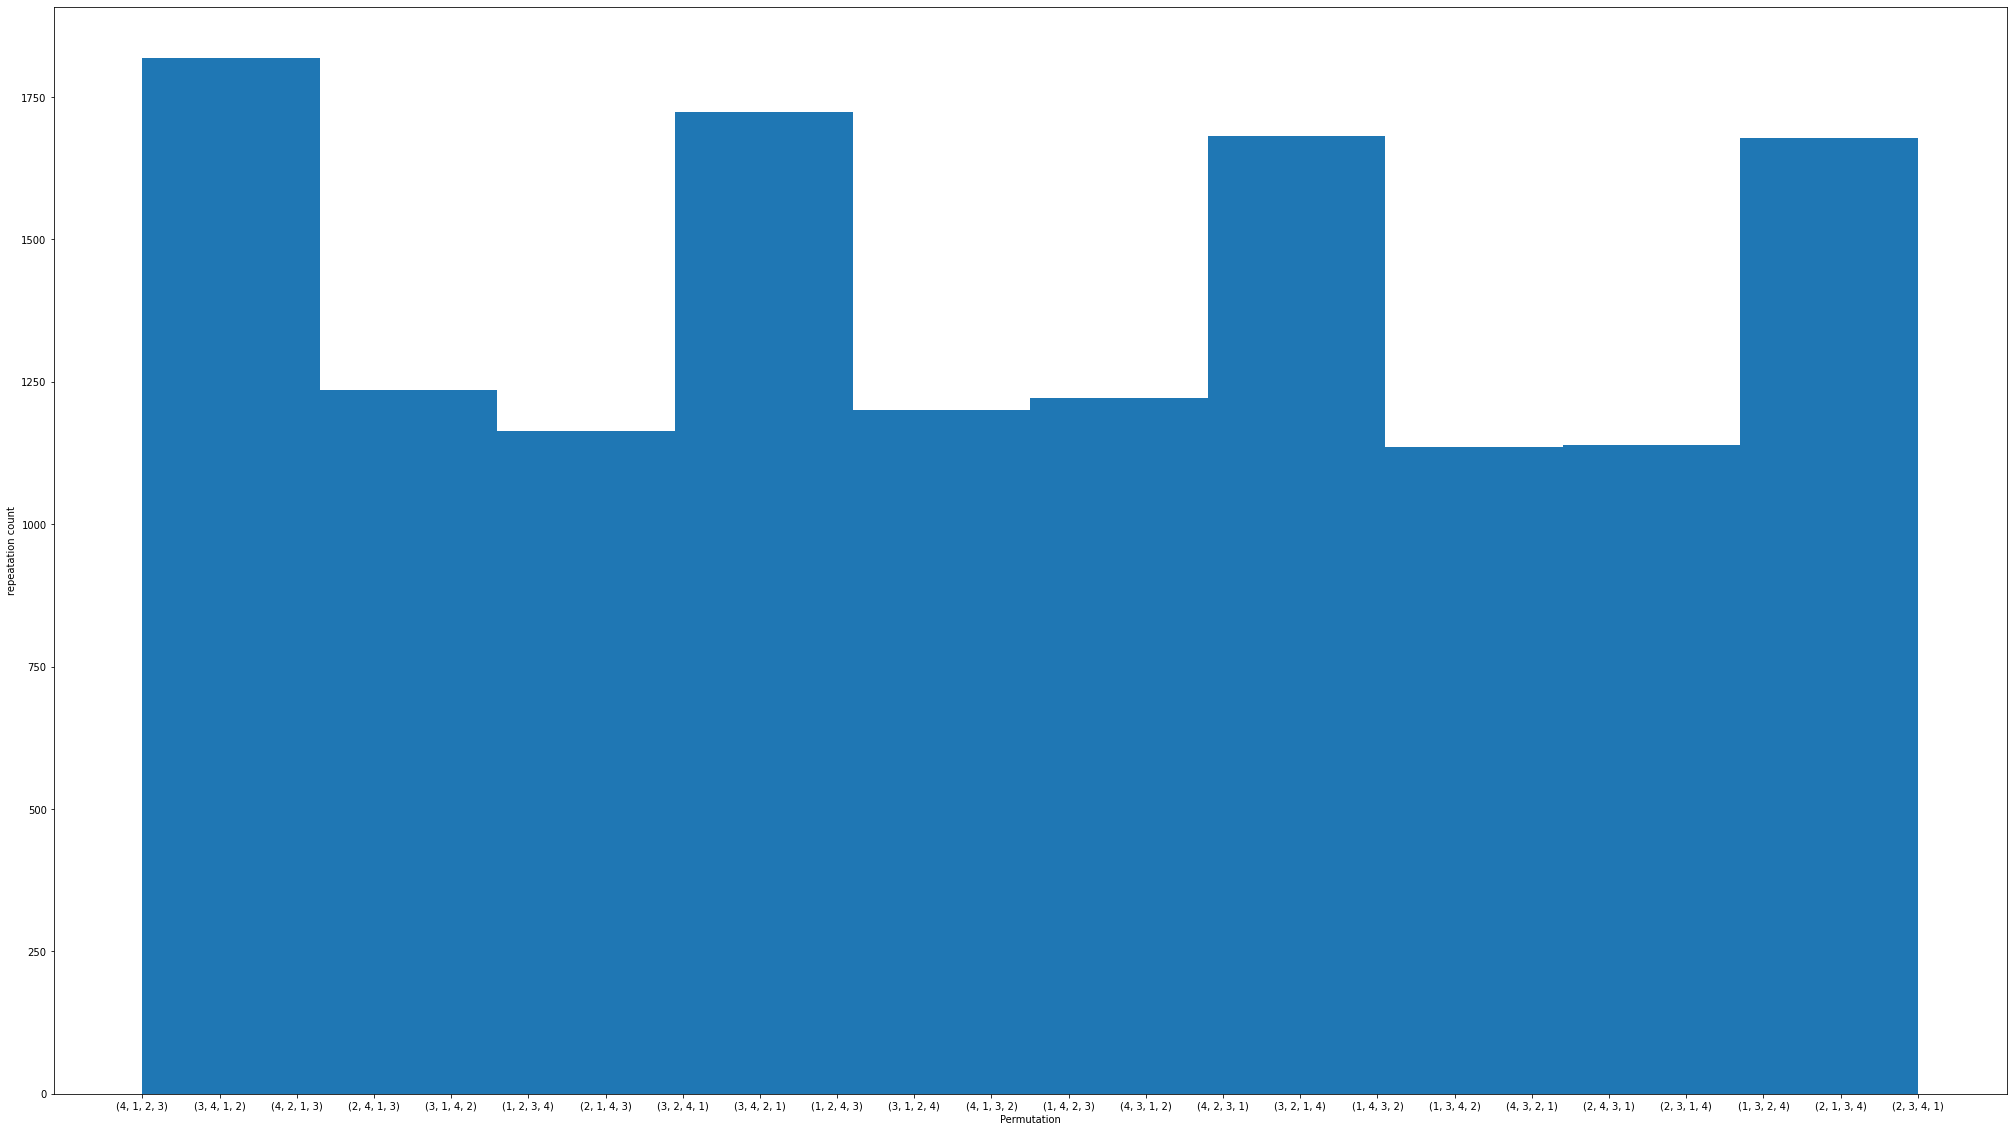

In [7]:
K=[]
for i in range(1000*p): #Running 1000**p times
  t = str(Random_per(4,14))
  K.append(t)
import matplotlib.pyplot as plt
plt.figure(figsize=(35,20))
plt.hist(K)
plt.xlabel('Permutation')
plt.ylabel('repeatation count')
plt.show()

$\huge \text{Q3.} \\ \text{Now, let us do the same exercise using MCMC. In the Markov chain modeling, the state space is given by all
possible feasible permutations.} \\ \text{ We will first write a function that generates a (uniformly) random feasible neighbour
of a given permutation. Two permutations in S are said} \\ \text{ to be neighbors if one result from an interchange of two of
the positions of the other, i.e., (1, 2, 3, 4) and (1, 2, 4, 3) are neighbours, but} \\ \text{ (1, 2, 3, 4) and (1, 3, 4, 2) are not.
Now find feasible set of neighbours among all neighbours. Implement this function to generate (uniformly)} \\ \text{ random
feasible neighbor of a given permutation. Each permutation is a state of the Markov chain. Note that this probability
is denoted as} \\ \text{ q(i, j), representing the probability of jumping to state j from the current state i. q(i, j) = 1/|N(i)|,
for j ∈ N(i), the set of neighbours of i.}$

In [8]:
def compute_neighbor_and_random(per,n,a):
  assert type(per) is np.ndarray

  neigh = []
  L= Fea_Per(n,a)
  for i in range(len(L)):
    diff = np.array(L[i]) - per
    non_zero_diff = sum(diff != np.zeros(len(per)))
    if (non_zero_diff==2):
      neigh.append(L[i])

  x = np.random.randint(0,len(neigh))
  return neigh, neigh[x]


In [9]:
def Q_ij(state_i):
  assert type(state_i) is np.ndarray
  x,y =compute_neighbor_and_random(state_i)
  if (len(x)!= 0):
    return 1/(len(x))
  else:
    print('No feasible Neighbors, so Total elements in neighbors set = zero and hence probability can not be calculated.')


$\huge \text{Q4.} \\ \text{Find} \\  
α(i, j) = min \{\frac{π(j)q(j, i)}{π(i)q(i, j)}, 1\} \\ 
\text{Note that π(s) is the same for all feasible permutations. After choosing a neighbour with} \\ \text{ probability q(i, j), the next
state will be j with probability α(i, j).}$

In [10]:
def alpha_ij(state_i, state_j):
  return min(1,  Q_ij(state_j)/Q_ij(state_i))

$\huge \text{Q5.} \\ \text{Write a program to generate the required permutations using the MCMC approach. Does it give reasonable
output? Experiment with your} \\ \text{ program and try several combinations of values of a = {int(p/2), 2p, 3p} and n =
{2, 8, 12}. By choosing some trivial values Checking that} \\ \text{ your MCMC implementation is producing the expected
results.}$

In [11]:
def gen_permutation_MCMC(N,n,a):
  A=[]
  for i in range(N):
    p,neigh_p = compute_neighbor_and_random(np.array(Random_per(n,a)),n,a)
    A.append(str(neigh_p))
  plt.figure(figsize=(45,20))
  plt.hist(A)
  plt.show()

In [20]:
# a values
a_val=[int(p/2),p]
# n values
n=4

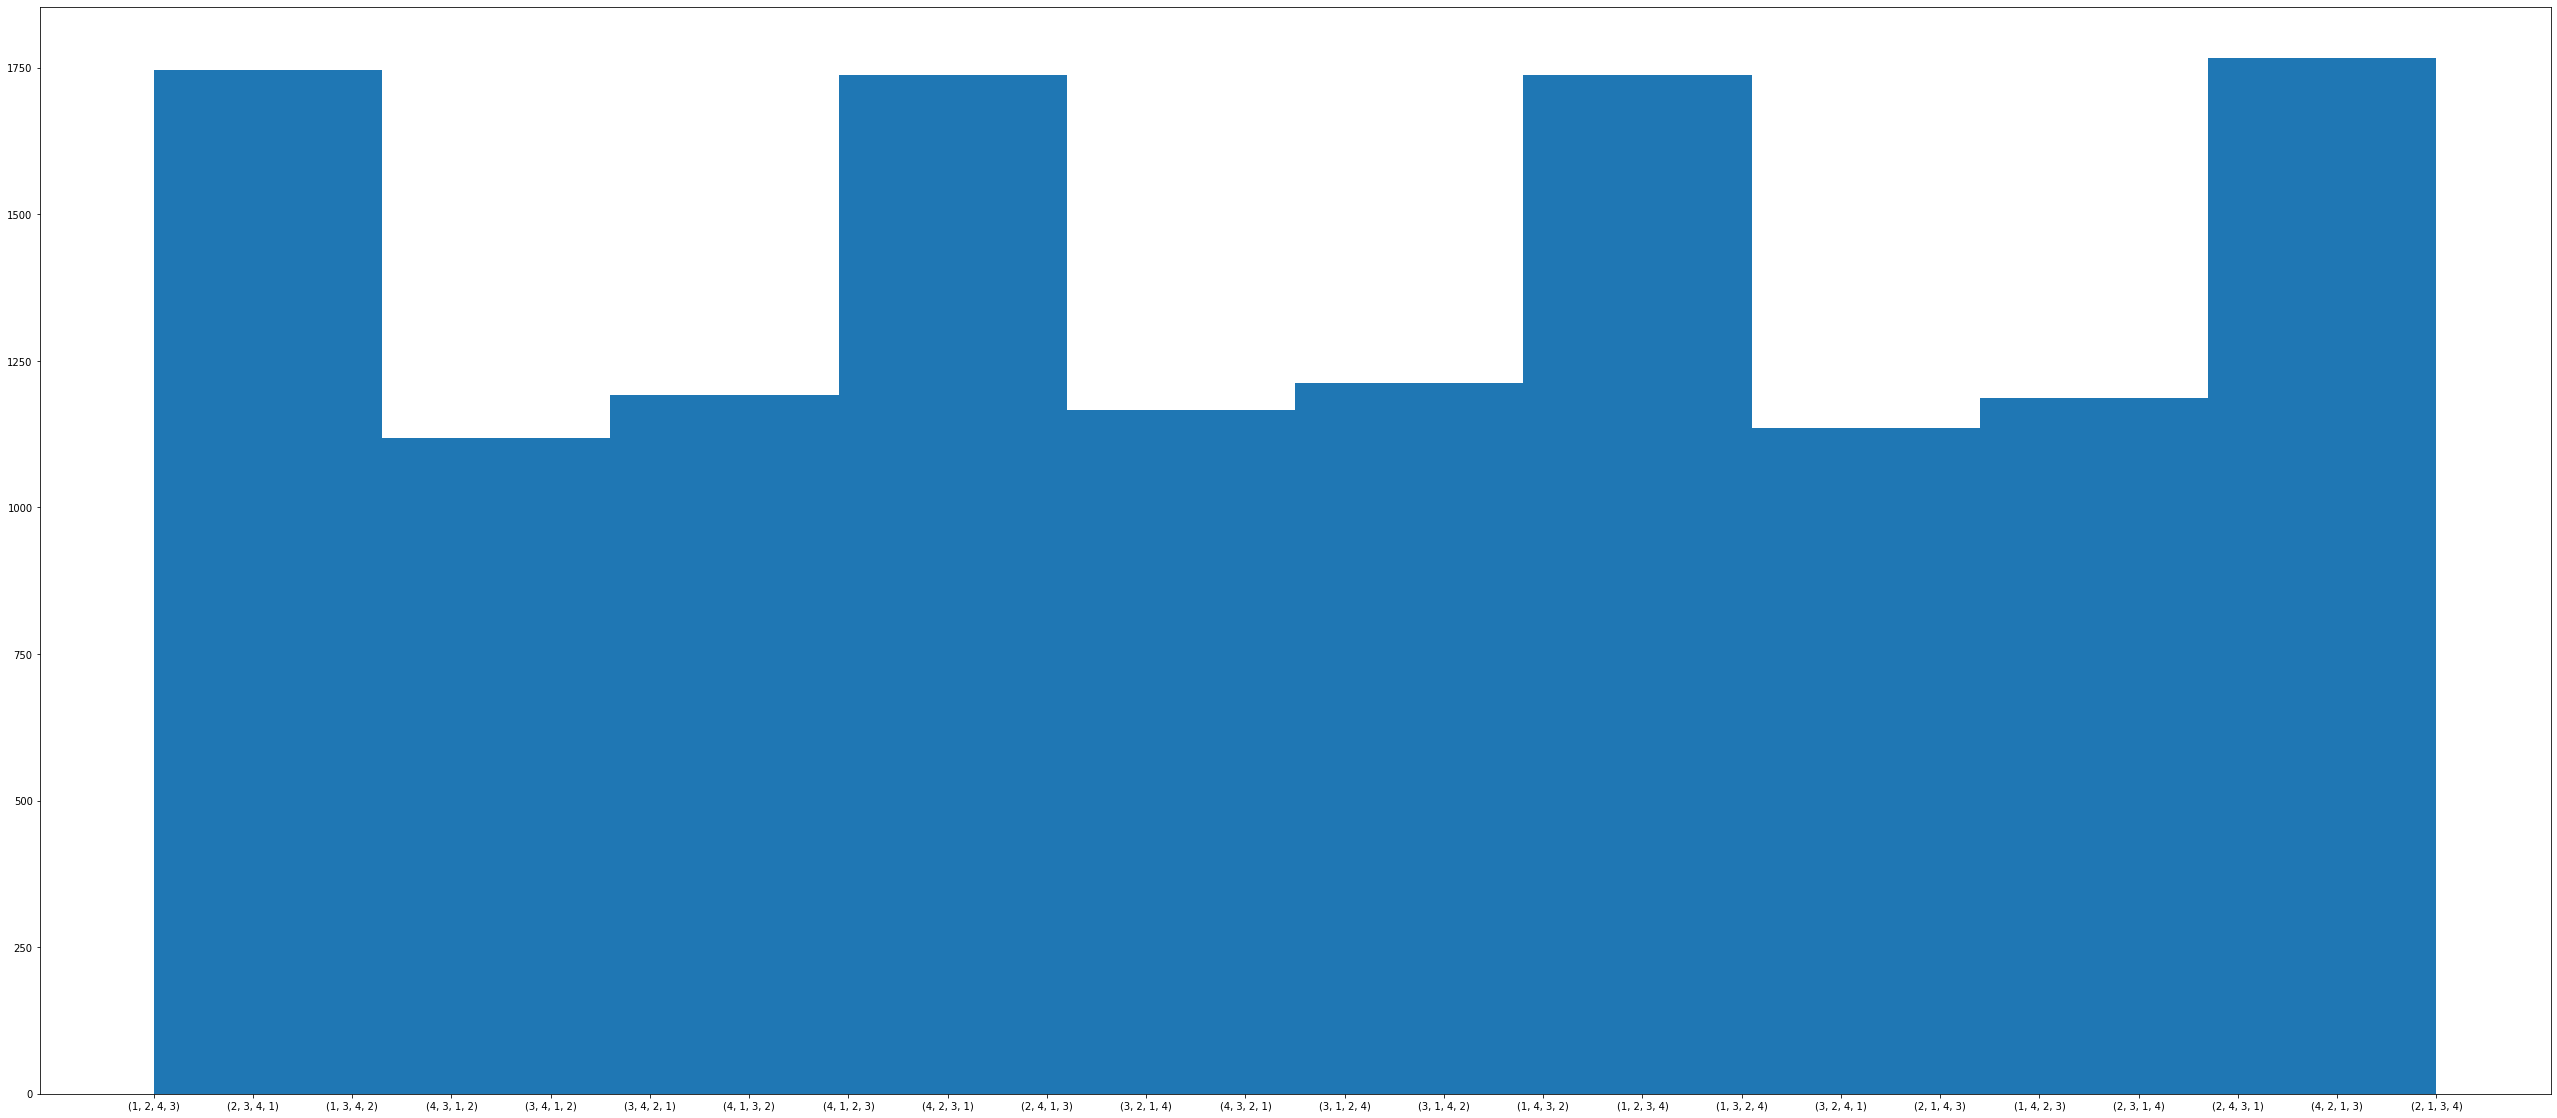

In [14]:
gen_permutation_MCMC(1000*p,4,14)

$\huge \text{Yes MCMC gives reasonable outputs.}$


$\large \text{Trying Different values of a and n:}$

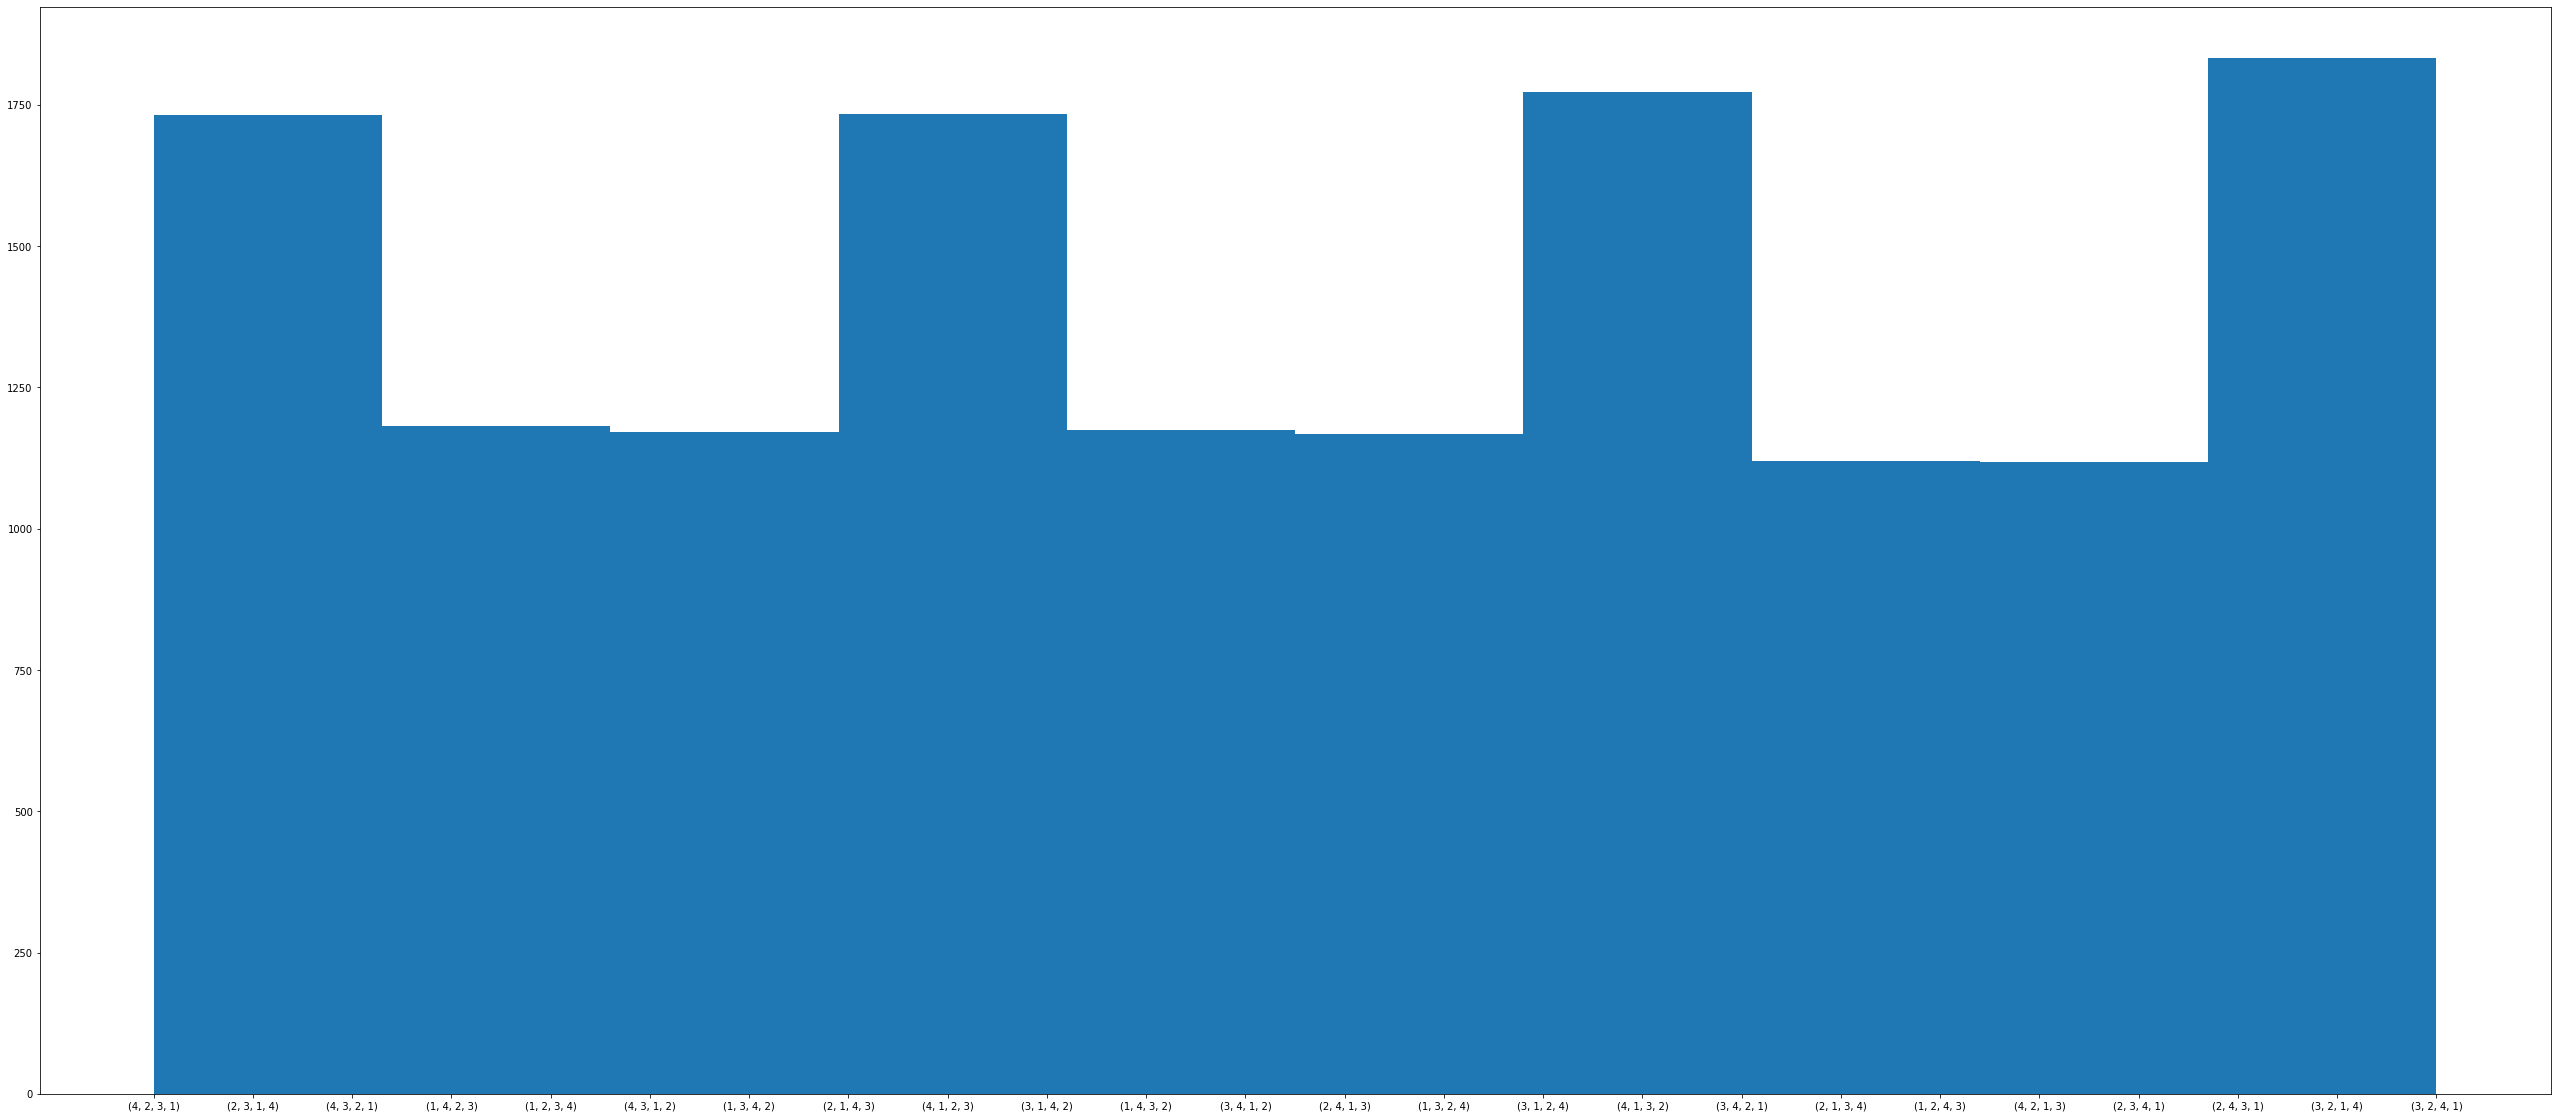

In [21]:
gen_permutation_MCMC(1000*p,n,a_val[0])

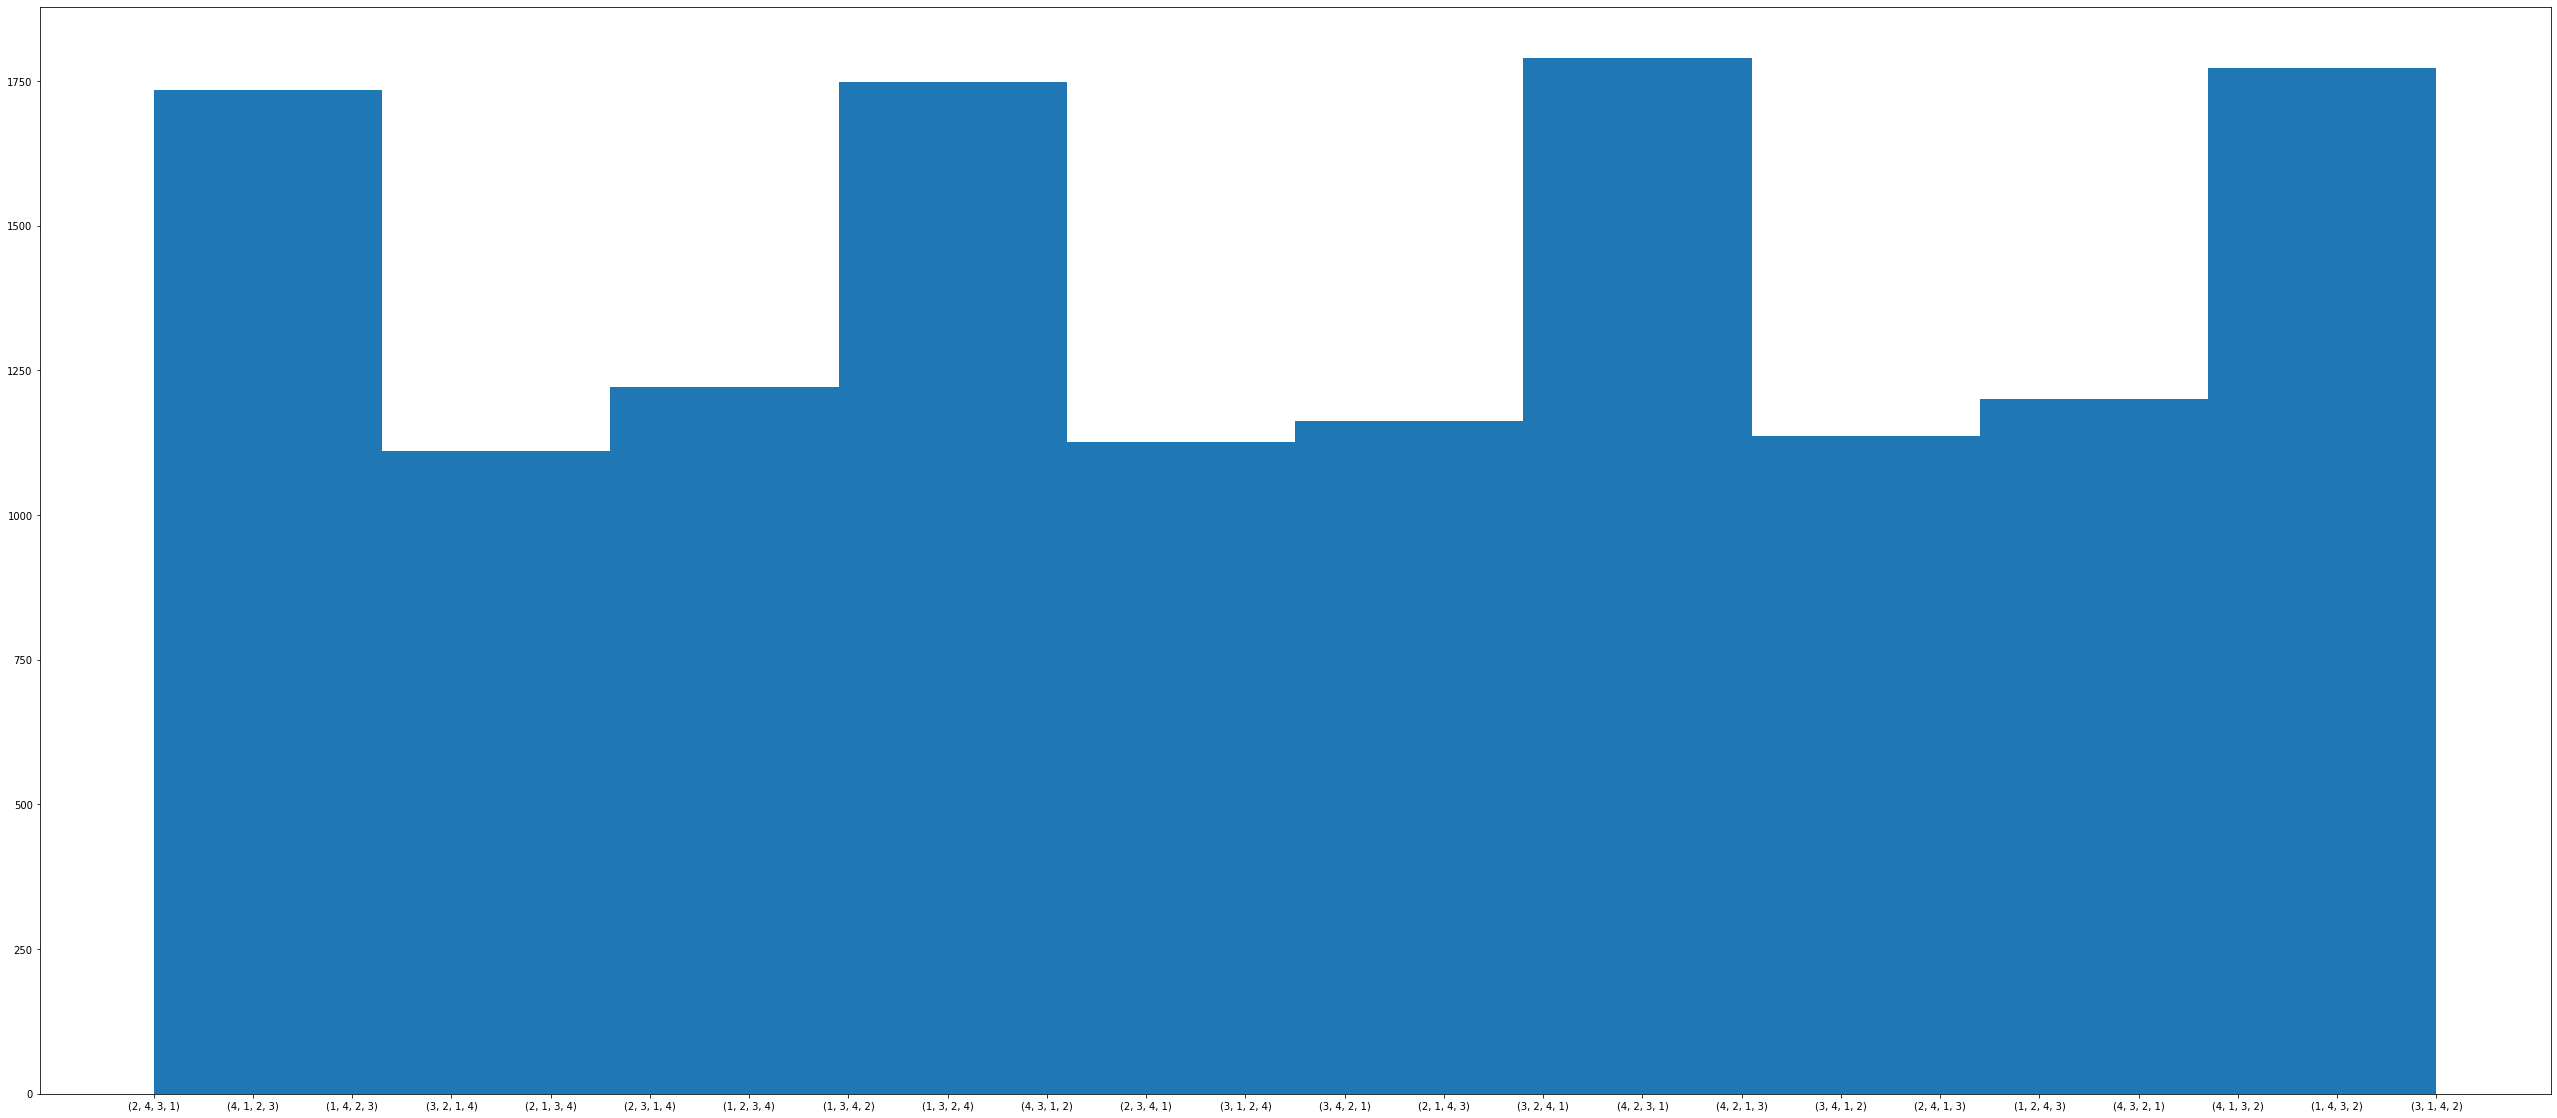

In [22]:
gen_permutation_MCMC(1000*p,n,a_val[1])

$\text{So by observing above histograms we can say that our MCMC method is working properly which gives similar results as we got by randomness.}$